# Big Data Lab Project
**Andrea Atzori**

# Web Scraping
Web scraping is useful to extract information from a website and convert it into tables or graphs. In the following lines, an analysis of a web page has been performed, that lists the highest grossing films of all history. The analysis has been done with the help of the library *beautiful soup* that parses the html into a readable format for Python. 
The format of the webpages is HTML but nowadays many companies are using the format JSON which is easier to understand as there is no need for a conversion, since it returns a structure which is compatible with the *dictionaries* in Python.

The first step is to import get from the requests library to parse the url. What is being printed by the cell below is the response text to the request of the HTML file.

In [ ]:
from requests import get

url = 'https://en.wikipedia.org/wiki/List_of_highest-grossing_films'

response = get(url)
print(response.text)

Below the *Beautiful Soup* has been called to parse the HTML.

In [3]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

The main purpose of the first part of the analysis is to extract a table from the HTML. The first thing to do is to inspect the webpage from any browser and find the strings to extract the table (*wikitable sortable plainrowheaders*). The function returns the table while the findall function has been used to find all the anchorpoints that contain the titles of the movies in the table.

In [4]:
table = html_soup.find('table', class_ = 'wikitable sortable plainrowheaders')
anchor_title = table.findAll('a')  # extract titles from anchor points

Next step is to run a loop that returns a list of all the Film titles in the Wikipedia table.

In [7]:
titles_tmp = list()                          # create a list
titles = list()
def get_titles(x):
    for items in anchor_title:                   # loops all the items in the anchor title that correspond to the title
        titles_tmp.append(items.get('title'))
    for words in titles_tmp:                     # loops the temporary list that contains empty parts and eliminates them, leaving us with the plain titles.
        if words == None: continue
        else:
            titles.append(words)
    print(titles)
get_titles(anchor_title) 

['Avatar (2009 film)', 'Titanic (1997 film)', 'Star Wars: The Force Awakens', 'Avengers: Infinity War', 'Jurassic World', 'The Avengers (2012 film)', 'Furious 7', 'Avengers: Age of Ultron', 'Black Panther (film)', 'Harry Potter and the Deathly Hallows – Part 2', 'Star Wars: The Last Jedi', 'Jurassic World: Fallen Kingdom', 'Frozen (2013 film)', 'Beauty and the Beast (2017 film)', 'The Fate of the Furious', 'Iron Man 3', 'Incredibles 2', 'Minions (film)', 'Captain America: Civil War', 'Transformers: Dark of the Moon', 'The Lord of the Rings: The Return of the King', 'Skyfall', 'Transformers: Age of Extinction', 'The Dark Knight Rises', 'Toy Story 3', "Pirates of the Caribbean: Dead Man's Chest", 'Rogue One', 'Pirates of the Caribbean: On Stranger Tides', 'Despicable Me 3', 'Jurassic Park (film)', 'Finding Dory', 'Star Wars: Episode I – The Phantom Menace', 'Alice in Wonderland (2010 film)', 'Zootopia', 'The Hobbit: An Unexpected Journey', 'The Dark Knight (film)', "Harry Potter and the 

**Regular Expressions**

The next step is to pull out the other data in the wikipedia table: the results in the box office and the years the movies have been released.

Regular Expressions have been used to pull out the box office results from the HTML. These are powerful python's instruments that allows to grab a text using particular symbols. The, the file has been cleaned and the numbers appendend in a python list.

In [8]:
import re                                           # import the library for regular expressions
content = table.findAll('td')                       # find the content of the table, which is included inside 'td' in an XTML format
#print(content)
box = list()                                        # create the empty list for the box office results
for g in content:                                   # loop every word in the content
    g = re.findall('\$.*',str(g))                   # pull out the strings we need through the use of regular expression (find the dollar sign and extract everything from it)
    #print(g)                                       # print the results      
    for item in g:                                  # loop the items just pulled to further clean the data
        if len(item) < 1: continue                  # eliminate empty strings
        box.append(item)                            # append them to the list created in the beginning
#print(box)
x = box[14]                                         # The regular expressions extracted a number followed by some symbols in HTML format at index 14 that must be eliminated
x = x.split('<')                                    # split the number and the expressions that follow the term '<'
x = x[0]                                            # take the first index of the string
#print(x)                    
box[14] = x                                         # substitute the cleaned number with 
print(len(box))                                     # check if the length has not changed 
#print(box[15])
print(box)                                          # print the final list

50
['$2,787,965,087', '$2,187,463,944', '$2,068,223,624', '$2,046,239,637', '$1,671,713,208', '$1,518,812,988', '$1,516,045,911', '$1,405,403,694', '$1,346,844,034', '$1,341,511,219', '$1,332,539,889', '$1,300,569,140', '$1,290,000,000', '$1,263,521,126', '$1,238,764,765', '$1,214,811,252', '$1,164,826,913', '$1,159,398,397', '$1,153,304,495', '$1,123,794,079', '$1,120,237,002', '$1,108,561,013', '$1,104,054,072', '$1,084,939,099', '$1,066,969,703', '$1,066,179,725', '$1,056,057,273', '$1,045,713,802', '$1,034,799,409', '$1,029,939,903', '$1,028,570,889', '$1,027,044,677', '$1,025,467,110', '$1,023,784,195', '$1,021,103,568', '$1,004,558,444', '$974,755,371', '$970,761,885', '$968,483,777', '$966,550,600', '$963,420,425', '$962,261,836', '$960,283,305', '$958,366,855', '$956,019,788', '$940,335,536', '$939,885,929', '$934,416,487', '$926,349,708', '$919,838,758']


In [9]:
year = list()
for y in content:                                        
    years = re.findall('.center;">([0-9]+)',str(y))  # extract the years using once again regular expressions, the expression that will be pulled out is only the one between parenthesis
    for y in years:
        year.append(y)                               # loop again and append the items in years to the final list
print(len(year))
print(year)


50
['2009', '1997', '2015', '2018', '2015', '2012', '2015', '2015', '2018', '2011', '2017', '2018', '2013', '2017', '2017', '2013', '2018', '2015', '2016', '2011', '2003', '2012', '2014', '2012', '2010', '2006', '2016', '2011', '2017', '1993', '2016', '1999', '2010', '2016', '2012', '2008', '2001', '2013', '1994', '2016', '2007', '2017', '2010', '2013', '2014', '2003', '2007', '2009', '2002', '2004']


# Data Frames
The next step is to include all the newly created list in a well formatted dataframe. 

In [10]:
import pandas as pd              # import the pandas library                   
df = pd.DataFrame()              # create the dataframe
df['Titles'] = titles            # append the lists (title, box and year) to the dataframe
df['Grossing'] = box
df['Year'] = year
df.index += 1                    # offset the index to start at position 1
df.columns.name = 'Rank'         # rename the index column to 'Rank'
df                               # Print the table

Rank,Titles,Grossing,Year
1,Avatar (2009 film),"$2,787,965,087",2009
2,Titanic (1997 film),"$2,187,463,944",1997
3,Star Wars: The Force Awakens,"$2,068,223,624",2015
4,Avengers: Infinity War,"$2,046,239,637",2018
5,Jurassic World,"$1,671,713,208",2015
6,The Avengers (2012 film),"$1,518,812,988",2012
7,Furious 7,"$1,516,045,911",2015
8,Avengers: Age of Ultron,"$1,405,403,694",2015
9,Black Panther (film),"$1,346,844,034",2018
10,Harry Potter and the Deathly Hallows – Part 2,"$1,341,511,219",2011


Despite the dataframe being well-formatted it won't give us any useful result as the contents of the columns are object and so they are *non-numeric*. Python will complain of an *Empty Dataframe with non-numeric values*.
The function *dtypes* returns the type of every column

In [9]:
df.dtypes    # Grossing need to be converted to numeric. Year could also be convert to a date but for the purpose of this analysis, it is not necessary.

#df['Year'] = pd.to_datetime(df['Year'],format = '%Y')     # this are the commands to convert the year column in a datetime
#df

Rank
Titles      object
Grossing    object
Year        object
dtype: object

# Plotting

In the following line The commas from the Grossing column have been removed and a new column named gross that replaces the *grossing* column has been created. The rows of the new column have been converted to numeric values.

In [11]:
gross = list()                       # create a new list 
for g in box:                        # loop the element in the original list box
    g = g.replace(',','')            # replace the commas with nothing
    g = g.replace('$','')
    gross.append(g)                  # append them to the list
print(gross)
df['Grossing'] = gross               # include the list in the dataframe

['2787965087', '2187463944', '2068223624', '2046143153', '1671713208', '1518812988', '1516045911', '1405403694', '1346844034', '1341511219', '1332539889', '1295525695', '1290000000', '1263521126', '1238764765', '1214811252', '1159398397', '1153304495', '1140966966', '1123794079', '1120237002', '1108561013', '1104054072', '1084939099', '1066969703', '1066179725', '1056057273', '1045713802', '1034799409', '1029939903', '1028570889', '1027044677', '1025467110', '1023784195', '1021103568', '1004558444', '974755371', '970761885', '968483777', '966550600', '963420425', '962261836', '960283305', '958366855', '956019788', '940335536', '939885929', '934416487', '926349708', '919838758']


In [12]:
#df['Grossing'] = df['Grossing'].astype(int)
df['Grossing'] = pd.to_numeric(df['Grossing'])     # convert the column grossing to a number

Calling *dtypes* again will return Grossing to be an int64 and allows to plot the data and perform some basic statistics.

In [13]:
df.dtypes

Rank
Titles      object
Grossing     int64
Year        object
dtype: object

The function *describe* shows some statistics of the dataframe.

In [14]:
df.describe()

Rank,Grossing
count,5.000000e+01
mean,1.205849e+09
std,3.711273e+08
min,9.198388e+08
25%,9.717603e+08
50%,1.066575e+09
75%,1.283380e+09
max,2.787965e+09


In [15]:
df['Grossing'].sum()         # sum the values of the column Grossing

60292463670

The mean of these 50 movies is: **\$1,205,849,000** while the sum of all the box offices results is **\$60,292,463,670**.

The final step is to plot the data extracted with the plot function and some functions of the *matplotlib* library.

In [16]:
import matplotlib.pyplot as plt                                                                                      # import library

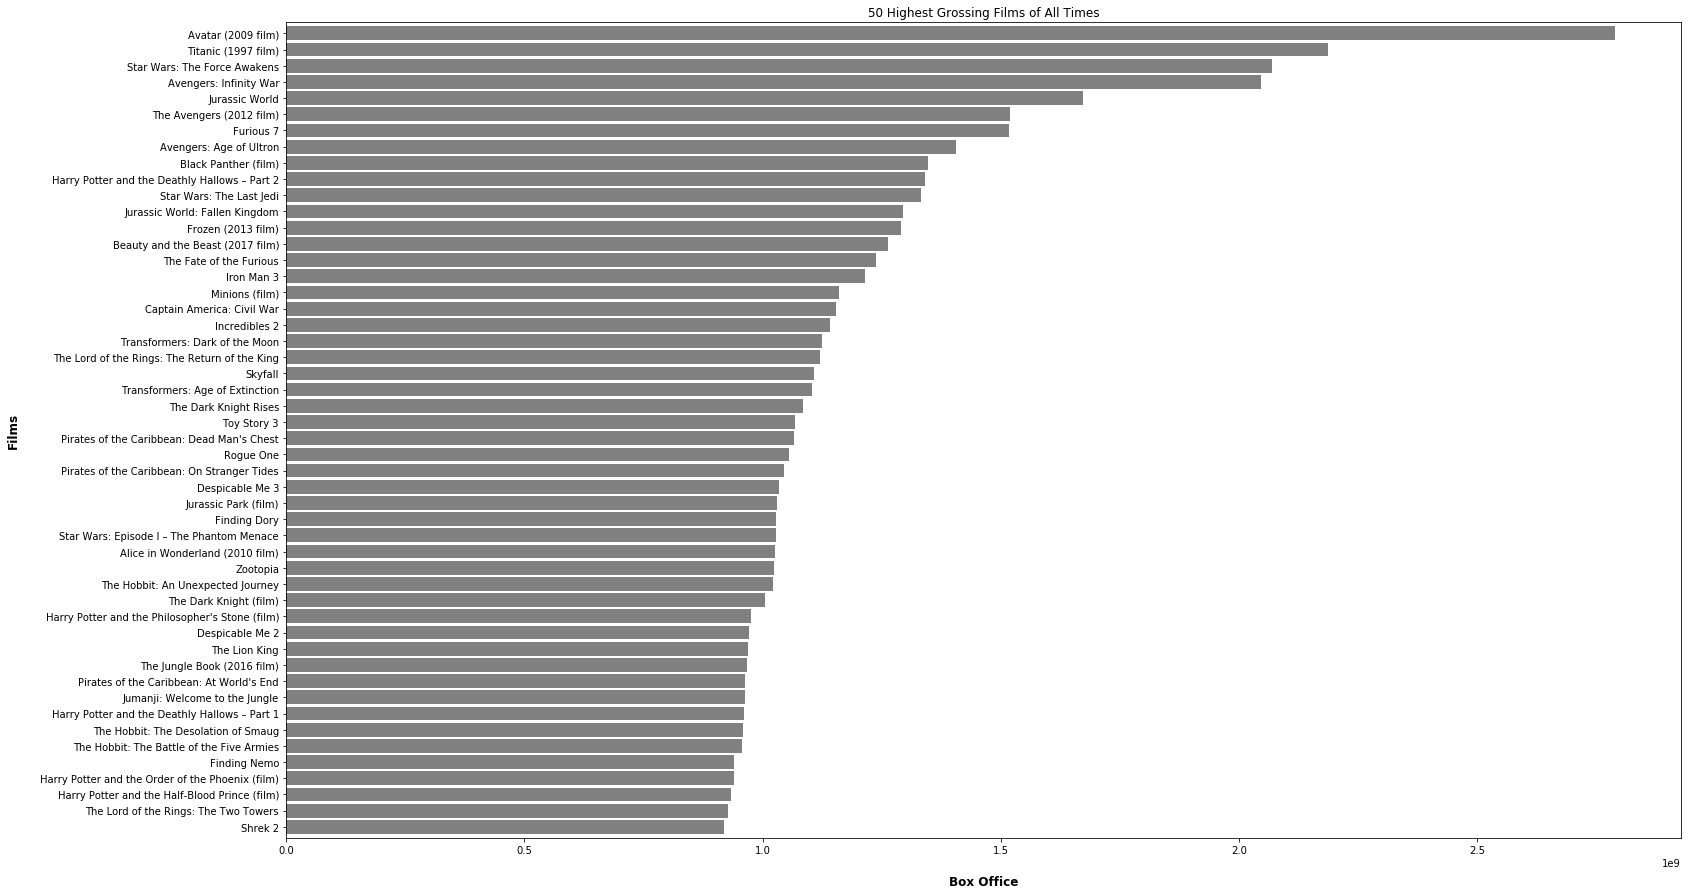

In [17]:
ax = df.plot(x="Titles", y="Grossing", kind='barh', figsize=(25, 15), width=0.85, legend = None, color = 'grey')     # plot Title and Grossing in a horizontal bar plot and set the figure parameters. With the horizontal barplot the axis are inverted
ax.set_xlabel("Box Office", labelpad=20, weight='bold', size=12)                                                     # choose the x label 
ax.set_ylabel("Films", labelpad=20, weight='bold', size=12)                                                          # choose the y label
ax.set_title("50 Highest Grossing Films of All Times")                                                               # choose the title  
plt.gca().invert_yaxis()                                                                                             # invert the yaxis, using matplotlib, to display the highest grossing film at the top. 
#ax.set_xticklabels(ticks)                                                                                           # this command changes ticks (scale) of the x axis

While the other movies have roughly had similar box office results, it is different for the first three movies, with Avatar that creates a big gap with the others.

The number on the right of the x axis(*1e9*) is a standard scientific notion and indicates the scale of the x axis (which is the y axis but the plot is an horizontal plot). A value of 2.5 in the axis, then, corresponds to a $2.5 * 1e9 = 2.5e9 \ \ -> \ 2.5*10^9 = \$2,500,000,000$.

The analysis continues by showing how many films there are in each year. This has been done with the function *value_counts* of the dataframe library. The 2017, 2016, 2015 have the highest grossing film combined.

In [18]:
#df['Year'].count()                   # counts the year column
df['Year'].value_counts()             # counts the values for each year    

2015    5
2016    5
2017    5
2012    4
2013    4
2018    4
2011    3
2010    3
2003    2
2007    2
2009    2
2014    2
2002    1
2008    1
1993    1
1994    1
1997    1
1999    1
2001    1
2006    1
2004    1
Name: Year, dtype: int64

The next step will create a new dataframe where the years are grouped and the Grossing are aggregated. The latter has been done with the function *.add* that creates a sort of dictionary where the grossing are summed by year.

In [ ]:
#df.groupby(['Year']).groups.keys()                                          # groups the years
df_grouped = df.groupby('Year', as_index=False).agg({"Grossing": "sum"})     # group the year and sum their box office results
df_grouped.index += 1                                                        # offset the index
df_grouped                                                                   # shows the dataframe 

Plot the second figure where the Film Box offices are grouped by year. The same structure as the plot before has been used. 

Text(0.5,1,'Film Box Office by Year')

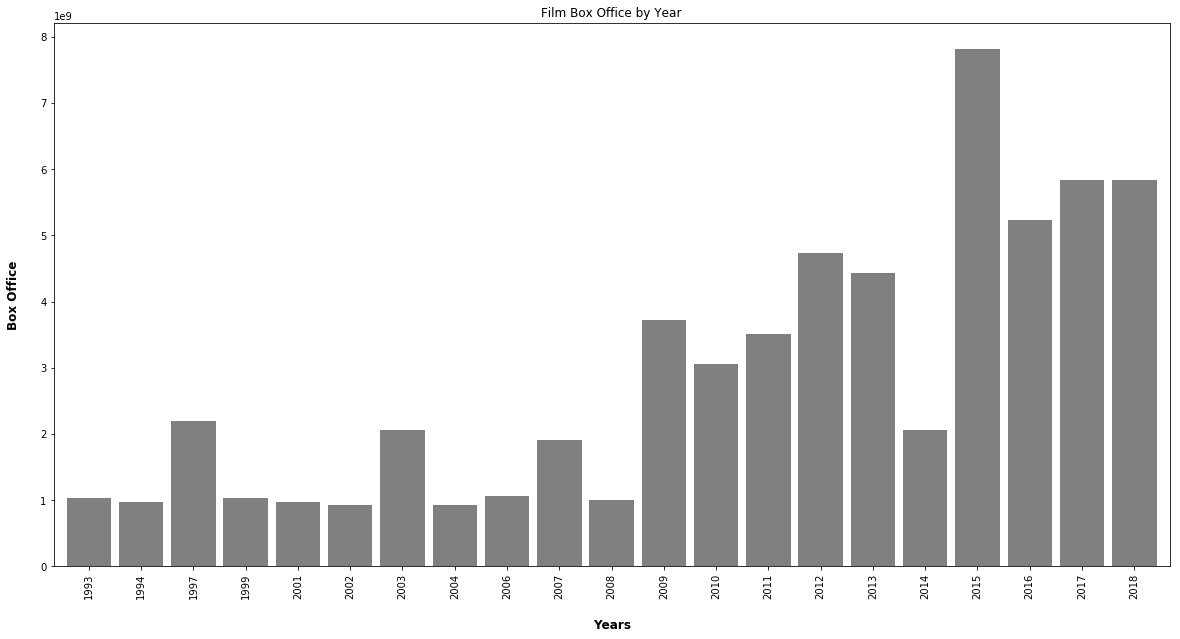

In [20]:
ax2 = df_grouped.plot(x="Year", y="Grossing", kind='bar', figsize=(20, 10), width=0.85, legend = None, color = 'grey') 
ax2.set_xlabel("Years", labelpad=20, weight='bold', size=12)
ax2.set_ylabel("Box Office", labelpad=20, weight='bold', size=12)
ax2.set_title("Film Box Office by Year")

In the plot above is possible to see that the movies have increased their box office results expecially in the last years with the only exeption of 2014 but the highest year has been 2015 with profits of **\$7,820,784,834**.

# Second Part
**Dictionaries**

In this part, an useful function that serves to count the most common word in a document has been implemented.

Import the URL using the same steps used at the beginning of the project and parsing it with beautiful soup.

In [21]:
from requests import get
url = 'https://en.wikipedia.org/wiki/List_of_highest-grossing_films'
response = get(url)
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')

In this case the nor *anchor points* or the *td* are needed to extract the table but it is necessary to extract the paragraphs from the HTML. They are pulled out finding the *p* in the file. This returns the paragraphs in an HTML format.

In [22]:
paragraphs = html_soup.findAll('p')

Next step is to loop all the paragraphs and append them to an empty list. This will return a list with the plain text of the paragraphs in the HTML.

In [23]:
text = list()                 # create an empty list
for par in paragraphs:        # loop every item in the paragraph
    text.append(par.text)     # append each paragraph to the empty list
#print(text)

In the next steps, the text has been split into words that are, later, included in a dictionary and then counted according to how many times they appear in the text. Some data cleaning has been performed to avoid errors in calculations. 

In [24]:
counts = dict()                                                         # create an empty dictionary
single_words = list()                                                   # create an empty list used to check if the operations in the dictionary are working correctly
for w in text:                                                          # loops the text
    w = w.split()                                                       # splits the text in words
    #print(w)                      
    for words in w:                                                     # loop every word   
        words = words.lower()                                           # convert every word into lower case to have a correct insensitive case count
        #print(words)
        single_words.append(words)                                      # append it to a list to check how many words there are in total and check if the dictionary is counting correctly
        counts[words] = counts.get(words,0)+1                           # use the get function to use the words as the key while the value is calculated accordin to each time each number appears (the get function increments the value by one)
#print(counts)
print("Number of Words in the Paragraph: ",len(single_words))           # print the number of words from the list             
print("Number of Words in the Dictionary: ",sum(counts.values()))       # print the number of words from the dictionary (the number is the same, this means that everything is working fine)

bigcount = None                                                         # set the count of the values to None
bigword = None                                                          # set the count of keys to None
for k,v in counts.items():                                              # loops the keys and the values in a dictionary
    if bigcount is None or v > bigcount:                                # if bigcount is None or if the looped value is greater than the bigcount 
        bigcount = v                                                    # then that value becomes the new most common value
        bigword = k                                                     # and the new most common word 
print('The most used word is','"',bigword,'"','repeated',bigcount, 'times')

Number of Words in the Paragraph:  5375
Number of Words in the Dictionary:  5375
The most used word is " the " repeated 409 times


**Stop Words**  
The most common word is *"the"* while there are 5375 words in the text. Creating a dataframe with all the most common words (can be found on the bottom of this project) will only returns a table with article, prepositions and similar, which are not relevant for the analysis. This problem has been overtaken with the removal of the so-called *stop-words*. The "for loop" will then ignore all the stop-words and return a data frame with only the relevant words.

In [25]:
import nltk                                             # import the nltk library
from nltk.corpus import stopwords                       # import stopwords

In [39]:
stop_words = set(stopwords.words('english'))            # create a list with all the stopwords                           
filtered_count = dict()
for i in single_words:                                                 
    if i in stop_words: continue                        # loop every word and exclude the stopwords   
    filtered_count[i] = filtered_count.get(i,0)+1       # create a dictionary with all the filtered words      
#print(filtered_count)
del filtered_count['films']                             # Among the most common words, film appears with its plural. The function 'del' has been used to eliminate the key and its value has been update with the merge of values of film and films.
filtered_count['film'] = 32+60
del filtered_count['gross']                             
filtered_count['grosses'] = 34+11

The procedure described above could have been done automatically using the library *stemming*; this however leads to a non-proper cut of words. A manual approach has been taken and after having analysed the other possible stems in the list of words, no further relevant changes can be observed .

In [44]:
filtered_lst = (sorted([(v,k) for k,v in filtered_count.items()],reverse = True))    # sort items in filtered_count (dictionary) and put them in a list
filtered_mainwords = pd.DataFrame()                                                  # create an empty dataframe
filtered_words = list()                                                              # create an empty list for the keys
filtered_word_count = list()                                                         # create an empty list for the values   
for v,k in filtered_lst[:30]:                                                        # loop the first 30 value in lst (most common)
    #print(k,v) 
    filtered_words.append(k)                                                         # append them to the empty lists                  
    filtered_word_count.append(v)
filtered_mainwords['Words'] = filtered_words                                         # insert those lists to a dataframe
filtered_mainwords['Count'] = filtered_word_count
filtered_mainwords.index += 1                                                        # offset index
filtered_mainwords

,Words,Count
1,film,92
2,grosses,45
3,million,36
4,earnings,25
5,billion,24
6,also,23
7,earned,19
8,total,18
9,worldwide,17
10,north,17


The final step of this analysis is to plot the most common words, free of the stop words and without uppercase letters that results in a wrong assessment.

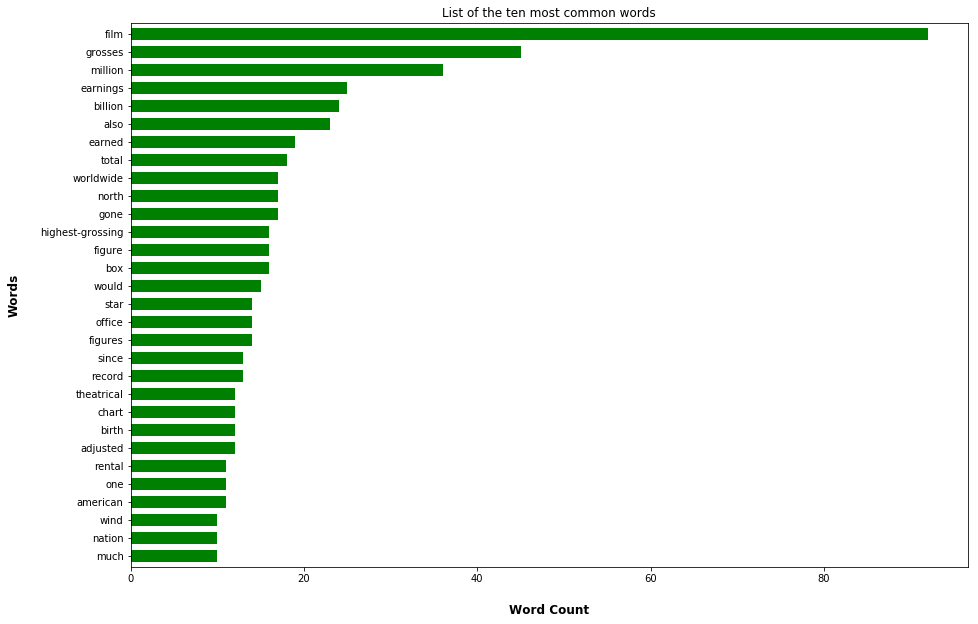

In [45]:
ax = filtered_mainwords.plot(x="Words", y="Count", kind='barh', figsize=(15, 10), width=0.70, legend = None, color = 'green')
ax.set_xlabel("Word Count", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Words", labelpad=20, weight='bold', size=12)
ax.set_title("List of the ten most common words")
plt.gca().invert_yaxis()

The most common word is films and if summed with the word film, it will reach a count of *92* words. Plurals could be eliminate with the use of the stemming library but this has not been done in this analysis.

**Extra Steps**  
Just for the sake of representing, the one below is the dataframe of the values of the main words including stopwords

In [46]:
lst = (sorted([(v,k) for k,v in counts.items()],reverse = True))    # sort items in count and put them in a list
mainwords = pd.DataFrame()                                          # create an empty dictionary
words = list()                                                      # create an empty list for the keys
word_count = list()                                                 # create an empty list for the values   
for v,k in lst[:10]:                                                # loop the first 10 value in lst (most common)
    #print(k,v) 
    words.append(k)                                                 # append them to the empty lists                  
    word_count.append(v)
mainwords['Words'] = words                                          # insert those lists to a dataframe
mainwords['Count'] = word_count
mainwords.index += 1                                                # offset index
mainwords

,Words,Count
1,the,409
2,of,160
3,and,140
4,in,125
5,to,92
6,a,83
7,with,79
8,is,70
9,for,62
10,films,60


This step stems the words to eliminate plurals, but it also eliminates the ending of words leaving their stem, thus, it has not been used for this analysis.

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()
for word in single_words:
    print(ps.stem(word)) 


<PorterStemmer>